# Scikit-learn API Overview & Practical Examples

## The Sklearn API Pattern

All sklearn estimators follow a consistent interface:

```python
# 1. Import and instantiate
from sklearn.some_module import SomeEstimator
model = SomeEstimator(param1=value1, param2=value2)

# 2. Fit (train)
model.fit(X_train, y_train)

# 3. Predict/Transform
predictions = model.predict(X_test)

# 4. Score
score = model.score(X_test, y_test)
```

This consistency makes it easy to swap models and compare performance!

## Working with Sklearn Datasets

Sklearn provides several built-in datasets for practice:

In [1]:
from sklearn.datasets import load_iris, load_diabetes, load_wine, load_breast_cancer
from sklearn.datasets import make_classification, make_regression
import pandas as pd
import numpy as np

# Load classification dataset (Iris)
iris = load_iris()
print("=== IRIS DATASET (Classification) ===")
print(f"Features: {iris.data.shape}")
print(f"Targets: {iris.target.shape}")
print(f"Feature names: {iris.feature_names}")
print(f"Classes: {iris.target_names}")
print(f"Description: {iris.DESCR[:200]}...\n")

# Load regression dataset (Diabetes)
diabetes = load_diabetes()
print("\n=== DIABETES DATASET (Regression) ===")
print(f"Features: {diabetes.data.shape}")
print(f"Target (disease progression): {diabetes.target.shape}")
print(f"Feature names: {diabetes.feature_names}")

=== IRIS DATASET (Classification) ===
Features: (150, 4)
Targets: (150,)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
Description: .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attribu...


=== DIABETES DATASET (Regression) ===
Features: (442, 10)
Target (disease progression): (442,)
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [2]:
# Convert to DataFrame for easier exploration
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species_name'] = iris_df['species'].map(
    {i: name for i, name in enumerate(iris.target_names)}
)

print("First 5 rows:")
print(iris_df.head())
print("\nDataset statistics:")
print(iris_df.describe())
print("\nClass distribution:")
print(iris_df['species_name'].value_counts())

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

Dataset statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%      

## Example 1: Classification with Wine Dataset

Let's build multiple classifiers and compare them:

In [3]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

print("Wine Dataset Info:")
print(f"Samples: {X.shape[0]}, Features: {X.shape[1]}")
print(f"Classes: {wine.target_names}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define multiple models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42)
}

# Train and evaluate each model
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)

results = {}
for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate
    train_acc = model.score(X_train_scaled, y_train)
    test_acc = accuracy_score(y_test, y_pred)
    
    results[name] = {'train': train_acc, 'test': test_acc}
    
    print(f"\n{name}:")
    print(f"  Train Accuracy: {train_acc:.4f}")
    print(f"  Test Accuracy:  {test_acc:.4f}")

# Show best model
best_model = max(results, key=lambda x: results[x]['test'])
print(f"\n🏆 Best Model: {best_model} (Test Acc: {results[best_model]['test']:.4f})")

Wine Dataset Info:
Samples: 178, Features: 13
Classes: ['class_0' 'class_1' 'class_2']

MODEL COMPARISON

Logistic Regression:
  Train Accuracy: 1.0000
  Test Accuracy:  0.9815

Decision Tree:
  Train Accuracy: 1.0000
  Test Accuracy:  0.9630

Random Forest:
  Train Accuracy: 1.0000
  Test Accuracy:  1.0000

SVM:
  Train Accuracy: 1.0000
  Test Accuracy:  0.9815

🏆 Best Model: Random Forest (Test Acc: 1.0000)


## Example 2: Regression with Diabetes Dataset

Predict disease progression using various regression models:

In [4]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

print("Diabetes Dataset Info:")
print(f"Samples: {X.shape[0]}, Features: {X.shape[1]}")
print(f"Target range: [{y.min():.1f}, {y.max():.1f}]")
print(f"Features: {diabetes.feature_names}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define regression models
reg_models = {
    'Linear Regression': LinearRegression(),
    'Ridge (L2)': Ridge(alpha=1.0),
    'Lasso (L1)': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

print("\n" + "="*60)
print("REGRESSION MODEL COMPARISON")
print("="*60)

for name, model in reg_models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Evaluate
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    print(f"\n{name}:")
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²:  {test_r2:.4f}")
    print(f"  Test RMSE: {test_rmse:.2f}")
    print(f"  Test MAE:  {test_mae:.2f}")

Diabetes Dataset Info:
Samples: 442, Features: 10
Target range: [25.0, 346.0]
Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

REGRESSION MODEL COMPARISON

Linear Regression:
  Train R²: 0.5279
  Test R²:  0.4526
  Test RMSE: 53.85
  Test MAE:  42.79

Ridge (L2):
  Train R²: 0.4424
  Test R²:  0.4192
  Test RMSE: 55.47
  Test MAE:  46.14

Lasso (L1):
  Train R²: 0.3646
  Test R²:  0.3576
  Test RMSE: 58.34
  Test MAE:  49.73

Random Forest:
  Train R²: 0.9242
  Test R²:  0.4428
  Test RMSE: 54.33
  Test MAE:  44.05

Gradient Boosting:
  Train R²: 0.8359
  Test R²:  0.4529
  Test RMSE: 53.84
  Test MAE:  44.60


## Example 3: Cross-Validation for Robust Evaluation

Use k-fold cross-validation to get more reliable performance estimates:

In [5]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_breast_cancer

# Load breast cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

print("Breast Cancer Dataset:")
print(f"Samples: {X.shape[0]}, Features: {X.shape[1]}")
print(f"Classes: {cancer.target_names}")
print(f"Class distribution: {np.bincount(y)}")

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Test multiple models with 5-fold CV
models_cv = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=5000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42)
}

print("\n" + "="*60)
print("5-FOLD CROSS-VALIDATION RESULTS")
print("="*60)

for name, model in models_cv.items():
    # Perform cross-validation
    cv_results = cross_validate(
        model, X_scaled, y, 
        cv=5, 
        scoring=['accuracy', 'precision', 'recall', 'f1'],
        return_train_score=True
    )
    
    print(f"\n{name}:")
    print(f"  Accuracy:  {cv_results['test_accuracy'].mean():.4f} (+/- {cv_results['test_accuracy'].std():.4f})")
    print(f"  Precision: {cv_results['test_precision'].mean():.4f} (+/- {cv_results['test_precision'].std():.4f})")
    print(f"  Recall:    {cv_results['test_recall'].mean():.4f} (+/- {cv_results['test_recall'].std():.4f})")
    print(f"  F1 Score:  {cv_results['test_f1'].mean():.4f} (+/- {cv_results['test_f1'].std():.4f})")

Breast Cancer Dataset:
Samples: 569, Features: 30
Classes: ['malignant' 'benign']
Class distribution: [212 357]

5-FOLD CROSS-VALIDATION RESULTS

Logistic Regression:
  Accuracy:  0.9807 (+/- 0.0065)
  Precision: 0.9782 (+/- 0.0136)
  Recall:    0.9916 (+/- 0.0069)
  F1 Score:  0.9848 (+/- 0.0050)

Random Forest:
  Accuracy:  0.9561 (+/- 0.0228)
  Precision: 0.9590 (+/- 0.0251)
  Recall:    0.9719 (+/- 0.0219)
  F1 Score:  0.9652 (+/- 0.0183)

SVM:
  Accuracy:  0.9736 (+/- 0.0147)
  Precision: 0.9754 (+/- 0.0197)
  Recall:    0.9831 (+/- 0.0106)
  F1 Score:  0.9791 (+/- 0.0115)


## Example 4: Creating ML Pipelines

Pipelines streamline preprocessing and modeling:

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline: Scale → PCA → Classify
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),  # Keep 95% variance
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Load data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train entire pipeline with one command
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Pipeline Results:")
print(f"Original features: {X_train.shape[1]}")
print(f"PCA components: {pipeline.named_steps['pca'].n_components_}")
print(f"Test Accuracy: {accuracy:.4f}")

# Access pipeline components
print(f"\nExplained variance ratio: {pipeline.named_steps['pca'].explained_variance_ratio_.sum():.4f}")

Pipeline Results:
Original features: 30
PCA components: 10
Test Accuracy: 0.9474

Explained variance ratio: 0.9511


## Example 5: Creating Synthetic Datasets

Generate custom datasets for testing:

Classification dataset: (1000, 20) (1000,)
Regression dataset: (1000, 10) (1000,)
Clustering dataset: (500, 2)


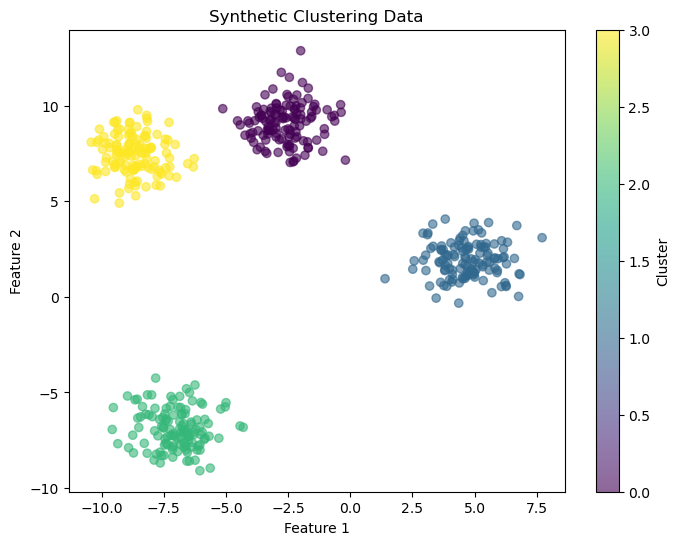

In [7]:
from sklearn.datasets import make_classification, make_regression, make_blobs
import matplotlib.pyplot as plt

# 1. Classification data
X_cls, y_cls = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=3,
    random_state=42
)
print("Classification dataset:", X_cls.shape, y_cls.shape)

# 2. Regression data
X_reg, y_reg = make_regression(
    n_samples=1000,
    n_features=10,
    n_informative=8,
    noise=10,
    random_state=42
)
print("Regression dataset:", X_reg.shape, y_reg.shape)

# 3. Clustering data
X_clust, y_clust = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1.0,
    random_state=42
)
print("Clustering dataset:", X_clust.shape)

# Visualize clustering data
plt.figure(figsize=(8, 6))
plt.scatter(X_clust[:, 0], X_clust[:, 1], c=y_clust, cmap='viridis', alpha=0.6)
plt.title('Synthetic Clustering Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

## Example 6: Hyperparameter Tuning with GridSearchCV

Find the best model parameters automatically:

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['rbf', 'linear']
}

# Create GridSearchCV
grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit grid search
print("Searching for best parameters...")
grid_search.fit(X_train_scaled, y_train)

# Results
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
print(f"Test set score: {grid_search.score(X_test_scaled, y_test):.4f}")

# Show top 5 configurations
results_df = pd.DataFrame(grid_search.cv_results_)
print("\nTop 5 configurations:")
print(results_df[['params', 'mean_test_score', 'rank_test_score']]
      .sort_values('rank_test_score')
      .head())

Searching for best parameters...
Fitting 5 folds for each of 40 candidates, totalling 200 fits

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.9667
Test set score: 0.9667

Top 5 configurations:
                                             params  mean_test_score  \
36       {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}         0.966667   
21  {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}         0.958333   
34      {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}         0.958333   
23   {'C': 10, 'gamma': 'auto', 'kernel': 'linear'}         0.958333   
25    {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}         0.958333   

    rank_test_score  
36                1  
21                2  
34                2  
23                2  
25                2  


## Sklearn API Cheat Sheet

### Common Patterns

```python
# Supervised Learning
model.fit(X_train, y_train)          # Train
y_pred = model.predict(X_test)        # Predict
score = model.score(X_test, y_test)   # Evaluate

# Unsupervised Learning
model.fit(X)                          # Learn structure
labels = model.predict(X)             # Assign clusters
X_transformed = model.transform(X)    # Reduce dimensions

# Transformers
X_scaled = scaler.fit_transform(X_train)  # Fit + transform
X_test_scaled = scaler.transform(X_test)  # Transform only

# Pipelines
pipe = Pipeline([('step1', Transformer()), ('step2', Estimator())])
pipe.fit(X_train, y_train)
pipe.predict(X_test)
```

### Important Attributes (after fitting)

- **Linear models**: `coef_`, `intercept_`
- **Tree models**: `feature_importances_`
- **PCA**: `explained_variance_ratio_`, `components_`
- **KMeans**: `cluster_centers_`, `labels_`

## Key Takeaways

1. **Consistent API**: All estimators follow `fit()`, `predict()`, `score()` pattern
2. **Data Preparation**: Always scale features for distance-based algorithms
3. **Train-Test Split**: Essential for unbiased evaluation
4. **Cross-Validation**: More reliable than single train-test split
5. **Pipelines**: Combine preprocessing and modeling elegantly
6. **Hyperparameter Tuning**: Use GridSearchCV or RandomizedSearchCV
7. **Built-in Datasets**: Great for learning and prototyping

### Best Practices

- Scale your features (StandardScaler, MinMaxScaler)
- Use `random_state` for reproducibility
- Apply `stratify` in train_test_split for imbalanced data
- Use pipelines to prevent data leakage
- Always evaluate on held-out test data
- Check for overfitting (compare train vs test performance)